<center><font size = "10"> Week 10 - Network Stimulation<center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member 1:
<br>Group member 2:
<br>Group member 3:
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.
    
<font size='3'><font color='red'>__IMPORTANT__ The code from the tutorials generates random connections between cells, if you want to compare results you have to keep the same connections (same axon section connected to same basal section) between the cells. The same happens with the location of the exponential synapses. 
Make sure to reset your connections if necessary. HINT: In this homework all of the exercises are connected, this can help you avoid repeating the implementations.

# Load, Classes and Functions

In [1]:
!nrnivmodl

/home/NX450-2023/Preparation/week11_NetworkSimulation_I
Mod files: "./vecevent.mod"

 -> Compiling mod_func.cpp
 => LINKING shared library ./libnrnmech.so
Successfully created x86_64/special


In [2]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuron import h, gui
from itertools import permutations
from scipy.signal import find_peaks


# Load external files & initialize
h.load_file("stdrun.hoc")
h.stdinit()

--No graphics will be displayed.


0.0

In [3]:
class Cell:
    def __init__(self, filename, name, cell_type):
        self.name = name
        self.type = cell_type
        self.synapses = []
        self.build_morphology(filename)
        self.biophysics()

    def build_morphology(self, filename):
        h.load_file("stdlib.hoc")
        h.load_file("import3d.hoc")
        if filename.endswith('.asc'):
            morph_reader = h.Import3d_Neurolucida3()
        else:
            morph_reader = h.Import3d_SWC_read()
        morph_reader.input(filename)
        i3d = h.Import3d_GUI(morph_reader, 0)
        i3d.instantiate(
            self
        )  # Notice this change to be able to instantiate several cells
        # all_sections should have the same order as neurom
        self.all_sections = self.soma + self.axon + self.dend
        if hasattr(self, 'apic'):
            self.all_sections += self.apic
        print(len(self.dend), len(self.all_sections))
        self.efferent_synapses = []
        self.afferent_synapses = []

    def biophysics(self):
        for sec in h.allsec():
            sec.Ra = 100  # Axial resistance in Ohm * cm
            sec.cm = 1  # Membrane capacitance in micro Farads / cm^2
            sec.insert("pas")
            for seg in sec:
                seg.pas.g = 0.00003
                seg.pas.e = -75

        # Insert passive current in the dendrite
        for sec in self.soma:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        if hasattr(self, "apic"):
            for sec in self.apic:
                sec.insert("hh")
                for seg in sec:
                    seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                    seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.dend:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

        for sec in self.axon:
            sec.insert("hh")
            for seg in sec:
                seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
                seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2

In [4]:
def spike_detector(voltage, threshold, time):
    # convert Neuron recording (voltage) to list
    voltage_read = np.array(voltage)
    # peak locations
    spike_time, _ = find_peaks(voltage_read, height=threshold)
 
    return np.array(time)[spike_time]



# <font color='red'> Exercise 1: spontaneous activity

    
For this exercise we will run a simulation of spontaneous activity by using noise to model "background" inputs.
By spontaneous we mean that no sensory input or direct stimulation is provided to the region.
The "background" inputs refer to inputs from other (not modeled) brain regions which could carry all sorts of information, but we have no clue what that information might be so we just use a noise stimulus instead.

cells.csv contains the 21 neurons from last week, morphologies contains their morphologies, and synapses.csv contains the synapses between them.

Instantiate a circuit (no need to worry about the positioning or rotation of the cells for this exercise) with those 21 cells connected by the synapses.
Set the synapses going out from all cells which have a morph_class of INT (in cells.csv) to have a reversal potential of -70mV.
    
For each neuron create a unique noise stimulus as in tutorial 1. Use an 'amp' value of 0.2.
Run a simulation for 600ms and create a spike raster plot alongside a connectivity diagram (as in tutorial 2).


    
<span style="color:purple">
<font size='3'> 
    

## **Grading**: 
- 1 pt for loading and connecting cells
- 1 pt for creating noise stimulus
- 0.5 pt each for raster and connectivity visualization
    

[/3 pt]    
</span>

In [5]:
df = pd.read_csv("cells.csv")
df

,Unnamed: 0,mtype,morph_class,morphology
0,0,L1_HAC,INT,morphologies/morph0.asc
1,1,L2_TPC:B,PYR,morphologies/morph1.asc
2,2,L2_TPC:B,PYR,morphologies/morph2.asc
3,3,L23_NBC,INT,morphologies/morph3.asc
4,4,L23_SBC,INT,morphologies/morph4.asc
5,5,L3_TPC:A,PYR,morphologies/morph5.asc
6,6,L3_TPC:A,PYR,morphologies/morph6.asc
7,7,L3_TPC:A,PYR,morphologies/morph7.asc
8,8,L3_TPC:A,PYR,morphologies/morph8.asc
9,9,L3_TPC:C,PYR,morphologies/morph9.asc


In [6]:
cells = []
for i, row in df.iterrows():
    model = Cell(f'morphologies/morph{i}.asc', row['mtype'] + str('i'), row['morph_class'])
    cells.append(model)


26775 lines read
68 638

21151 lines read
63 238

14525 lines read
46 326

12375 lines read
110 428

14334 lines read
83 1018

4805 lines read
36 131

4510 lines read

morphologies/morph6.asc problems


Main branch starting at line 18 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma
44 139

29325 lines read
60 313

6222 lines read

morphologies/morph8.asc problems


Main branch starting at line 17 is outside the soma bounding boxes
  Making a logical connection to center of nearest soma
68 227

21187 lines read
58 379

5665 lines read
87 192

22604 lines read
53 304

3489 lines read
96 182

14371 lines read
45 431

16204 lines read
141 338

12098 lines read
51 321

20064 lines read
256 507

9634 lines read
62 187

5042 lines read
81 160

9424 lines read
46 410

19530 lines read
72 816


In [7]:
synapses = pd.read_csv("synapses.csv")
synapses

,Unnamed: 0,@source_node,@target_node,efferent_section_id,efferent_section_pos,afferent_section_id,afferent_section_pos
0,0,0,8,64,0.428181,213,0.887304
1,1,0,8,76,0.468049,212,0.745793
2,2,0,8,109,0.249276,216,0.970667
3,3,0,8,224,0.567864,207,0.083850
4,4,0,8,367,0.174268,206,0.513085
...,...,...,...,...,...,...,...
96,96,15,16,28,0.151952,420,0.352910
97,97,15,16,28,0.959333,420,0.524575
98,98,15,16,30,0.000926,420,0.532609
99,99,15,16,159,0.995526,481,0.269421


In [8]:


def place_synapse(pre_cell, post_cell, synapse_data):

    post_segment = post_cell.all_sections[int(synapse['afferent_section_id'])](synapse['afferent_section_pos'])
    pre_section = pre_cell.all_sections[int(synapse['efferent_section_id'])]
    pre_segment = pre_section(synapse['efferent_section_pos'])
    syn = h.ExpSyn(post_segment)
    nc = h.NetCon(pre_segment._ref_v, syn, sec=pre_section)
    nc.weight[0] = 0.5
    nc.delay=5 # a 5ms delay gives us more interpretable results, but be aware synaptic transmission is usually a lot faster
    pre_cell.efferent_synapses.append((syn, nc))
    post_cell.afferent_synapses.append((syn, nc))

    return syn, nc

synapse_models = []
netcons = []
for _, synapse in synapses.iterrows():
    source = cells[int(synapse['@source_node'])]
    target = cells[int(synapse['@target_node'])]
    syn, nc = place_synapse(source, target, synapse)
    synapse_models.append(syn)
    netcons.append(nc)
    if df.loc[int(synapse['@source_node']), 'morph_class'] == 'INT':
        syn.e = -70 # mV


'\nbkg_stims = []\nbkg_currents = []\nfor cell in cells:\n    stim = h.IClamp(cell.soma[0](0.5))\n    stim.delay = 0\n    stim.dur = 1e9\n    last = 0\n    stimulus_by_time = []\n    decay = 0.5 * h.dt\n    change_rate = 0.9 * h.dt\n    for st in np.arange(0, 3000, h.dt):\n        change = np.random.normal() * change_rate\n        new = last - (last * decay) + change\n        if new < 0:\n            new = 0\n        last = new\n        stimulus_by_time.append(new)\n    stimulus_by_time = np.array(stimulus_by_time)\n    stimulus_by_time *= 0.2\n    stim_current = h.Vector(stimulus_by_time)\n    bkg_currents.append(stim_current)\n    plt.plot(stimulus_by_time, alpha=0.1)\n    plt.xlim(0, 1000)\n    stim_current.play(stim._ref_amp, h.dt)\n    bkg_stims.append(stim)\n'

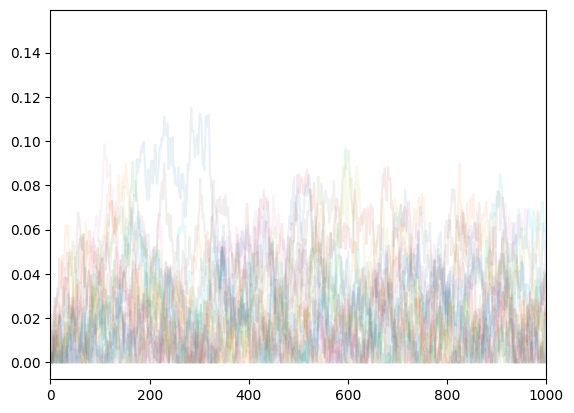

In [9]:

bkg_stims = []
bkg_currents = []
for cell in cells:

    stim = h.IClamp(cell.soma[0](0.5))
    stim.delay = 0
    stim.dur = 1e9
    last = 0
    stimulus_by_time = []
    decay = 0.5
    amp = 0.2
    for st in np.arange(0, 3000, h.dt):
        change = np.random.normal() * amp * h.dt
        new = last - (last * decay * h.dt) + change
        if new < 0:
            new = 0
        last = new
        stimulus_by_time.append(new)
    stim_current = h.Vector(stimulus_by_time)
    bkg_currents.append(stim_current)
    plt.plot(stimulus_by_time, alpha=0.1)
    plt.xlim(0, 1000)
    stim_current.play(stim._ref_amp, h.dt)
    bkg_stims.append(stim)




In [10]:
def run_simulation(simulation_time):
    Vm = []
    for cell in cells:
        v = h.Vector()
        v.record(cell.soma[0](0.5)._ref_v)
        Vm.append(v)


    time = h.Vector()
    time.record(h._ref_t)


    h.finitialize(-65)
    h.load_file('stdrun.hoc')
    h.continuerun(simulation_time)

    return Vm, time



Vm, time = run_simulation(600)



(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: >, <Axes: xlabel='time (ms)', ylabel='Neuron'>],
       dtype=object))

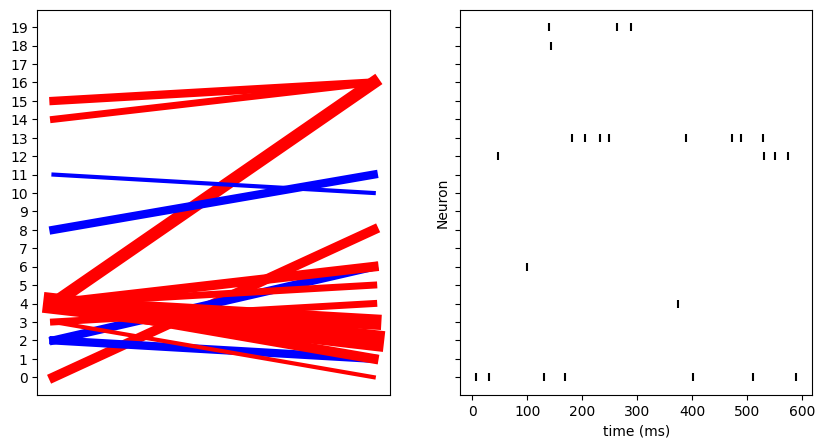

In [11]:
def connectivity_plot(axis, synapses, cells_df):
    for (pre, post), conn in synapses.reset_index().groupby(['@source_node', '@target_node'])['index'].count().items():
        axis.plot([0, 1], [pre, post], linewidth=conn, color='red' if cells_df.loc[pre, 'morph_class'] == 'INT' else 'blue')
    axis.set_yticks(range(len(cells_df)))
    axis.set_xticks([])

def spike_raster(Vm, time, axis):
    for i, v in enumerate(Vm):
        spiketimes = spike_detector(np.array(v), -20, time)
        axis.scatter(spiketimes, [i] * len(spiketimes), marker='|', color='k')
    axis.set_xlabel("time (ms)")

    
def plot_results(Vm, time):
    f, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))
    
    connectivity_plot(axes[0], synapses, df)
    spike_raster(Vm, time, axes[1])
    
    plt.ylabel('Neuron')
    return f, axes



plot_results(Vm, time)

# <font color='red'> Ex2: Evoked activity.

Connect external synapses to cells 2, 4, and 8. Continue to apply background input as before.
    
Create a single spiketrain of poisson spiking at 40Hz starting at 200ms and stoppping at 400ms. Apply this as input to all external synapses.
Simulate the response for 600ms and create a raster plot of the network's spiking activity overlaid with the input spiking.


<span style="color:purple">
<font size='3'> 
    

## **Grading**: 
- [0.5 pt for creating synapses].
- [0.5 pt for creating correct stimulus]
- [0.5 pt for visualizing raster plot with stimulus]
    
    
[/1.5] 
</span>

In [12]:
stim_start = 200
stim_end = 400

external_synapses = []
ext_netcons = []
ext_stims = []
connprob = 0.6
ext_spike_trains = [] 
stimulated_nrns = []
rate = 40 # Hz
ext_spikes = stim_start + np.random.exponential(1000/rate, size=100).cumsum() # poisson train

ext_spikes = ext_spikes[ext_spikes < stim_end]
stimulated = []
for i, cell in enumerate(cells):
    if i not in [2, 4, 8]:
        continue
    stimulated.append(i)
    syn = h.ExpSyn(cell.soma[0](0.5))
    stim = h.VecStim()
    stim.play(h.Vector(ext_spikes))
    nc = h.NetCon(stim, syn)
    nc.weight[0] = 1
    nc.delay = 0
    external_synapses.append(syn)
    ext_netcons.append(nc)
    ext_stims.append(stim)
    ext_spike_trains.append(ext_spikes)
    stimulated_nrns.append(i)


In [13]:

Vm, time = run_simulation(600)

2
4
8


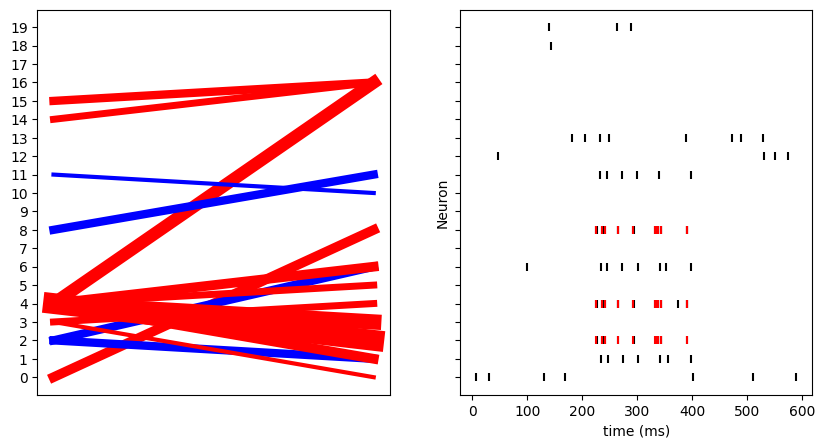

In [14]:
fig, axis = plot_results(Vm, time)

for i in [2, 4, 8]:
    axis[1].scatter(ext_spikes, [i] * len(ext_spikes), marker='|', color='red')
    print(i)

# <font color= 'red'>Ex 3: Model manipulation
    
In very young mice the reversal potential of GABA-A receptors is around -30 mV. 
Let us see how such a thing influences the dynamics of our network (but note that the cortex of very young animals is different in A LOT of other ways).
    
Change the reversal potential of the inhibitory synapses and run the simulation again.
How does this change the network's spontaneous and evoked responses?
Can you explain why?


<span style="color:purple">
<font size='3'> 
    

## **Grading**: 
- [0.5 pt] for correct change
- [1 pt] for explaining the effects on network activity.

[/1.5 pt]    
</span>

<span style="color:purple">
<font size='3'> 

## Answers

- Expect to see the spontaneous rates be only slightly affected, but the most obvious change will be that the evoked activity will persist longer after the stimulus is gone.
- The reason why is relatively obvious: without inhibition to suppress the recurrent activity, information will just keep cycling forever. Ooh, I wonder if that has anything to do with the presence of both reduced inhibition and excessive rumination in depressive patients. 


2
4
8


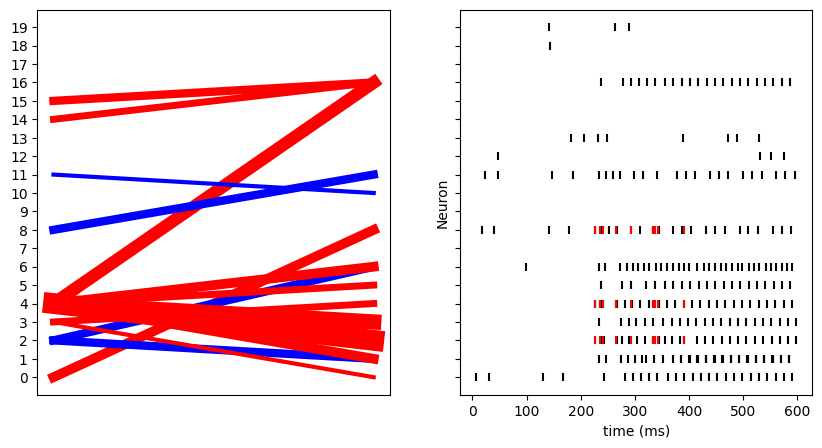

In [18]:
#del netcons
for i, cell in enumerate(cells):
    if df.loc[i]['morph_class'] == 'INT':
        for syn, nc in cell.efferent_synapses:
            syn.e = -30

Vm, time = run_simulation(600)
fig, axis = plot_results(Vm, time)

for i in [2, 4, 8]:
    axis[1].scatter(ext_spikes, [i] * len(ext_spikes), marker='|', color='red')
    print(i)